In [ ]:
'''
.....IMPORTANT USAGE INSTRUCTIONS........

##### IF USING CHPC - UTAH #####

1. Download this Jupyter Notebook to a local location on your Computer
2. Go to https://ondemand.chpc.utah.edu and sign in using your uNID and Password.
3. At the Top of the Page, notice the Menu "Interactive Apps". Click and Choose "Jupyter Notebook on Notchpeak"
4. A form will open, enter all details, and then Launch a Jupyter Notebook. It will take a minute.
5. Click on "Connect to Jupyter"
6. Once Jupyter Launches. On Top Right Notice "Upload Button". Use this to Upload this Notebook.
7. The Notebook will be uploaded. Finish writing the Code whereever specified.
8. Run each Block of Code and then finally download the Jupyter Notebook by going to File >> Download as >>


##### IF USING GOOGLE COLAB #####

1. Download this Jupyter Notebook to a local location on your Computer
2. Go to https://colab.research.google.com/ and sign in using your Google Account - So that your work is saved in
   your Google Drive permanently.
3. Go to File >> Upload Notebook.
4. Finish writing the Code whereever specified.
5. Run each Block of Code ad then finally download the Jupyter Notebook by going to File >> Download .ipynb
6. Enable GPU. https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d 

'''

In [ ]:
'''
.....IMPORTANT SUBMISSION INSTRUCTIONS........

Once everything runs successfully, download the jupyter notebook and attach that to your submission in Canvas. 
During evaluation, I will run your Jupyter Notebook to verify that everything is running as expected.

Do not forget to include your main results and plots in your latex file (with other homework questions) 
before submission.

'''

In [ ]:
%matplotlib inline

from sklearn.datasets import fetch_openml #Import MNIST from a Package
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Standard PyTorch Imports
import torch
from torch import nn
import torch.nn.functional as F

#We will be using the PyTorch Wrapper Framework skorch to help simplify the coding
from skorch import NeuralNetClassifier

#We need to import some Sci-kit Learn modules for computation purposes.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Global Settings - These settings are critical

#If CUDA is available, use CUDA or else default to CPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#Setting a seed for torch
torch.manual_seed(0)

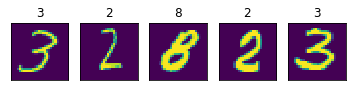

In [2]:
'''
Idea is to import Data from fetch_openml package and perform some Normalization

'''

mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')


'''
Normalize each input from [0.0,1.0] range
'''
X /= 255.0

'''
Reshape X to have 4 dimension that is batch_size, channels, Height, Width

'''

'''
Exercise - Explain the role of the indices of the reshape function below.
'''

XCnn = X.reshape(-1, 1, 28, 28)

'''
Test Train Split for Calculating accuracy on a Held Out Test Dataset.
'''
X_train, X_test, y_train, y_test = train_test_split(XCnn, y, test_size=0.25, random_state=42)

'''
Will do some basic plotting to get a feel for the data that we imported.

'''

def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
        
plot_example(X_train, y_train)

In [21]:
class Cnn(nn.Module):
    def __init__(self, dropout=0.4):
        super(Cnn, self).__init__()
        
        '''Exercise - Fill in the architecture'''

    def forward(self, x):
        '''Exercise - Fill in the Forward propagation function'''
        return x

In [4]:
'''
Check Device == 'cuda'. USE GPU !!!!. Otherwise things will be super slow. Check
https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d 
'''

print('Using Device = ',device)

Using Device =  cuda


In [28]:
'''
We invoke Skorch to wrap our NN defined using PyTorch above

'''

cnn = NeuralNetClassifier(
    Cnn,
    #These are just some defaults we specify. These will be overridden by skorch during Gridsearch
    max_epochs=25,
    lr=0.0001,
    device=device,
    optimizer=torch.optim.Adam
)

In [ ]:
'''

NNs are all about Parameter tuning. This is where we invoke the Skorch Package to simplify our life and exhaustively
tune the NN.

Just as you do Grid Search for usual Machine Learning Algorithms in Python. You specify your grid. Using this grid
SkLearn forms all possible combinations of Parameters and refits the NN for each unique combination formed out of the
grid.

'''

'''
Exercise - Play with this grid of parameters. Report the best settings.
'''

grid = {
    'lr': [0.0001, 0.0003]
    ,'max_epochs' : [20,25]
}

'''
Important that you keep refit = True
'''
gs = GridSearchCV(cnn, grid, refit=True, cv=3, scoring='accuracy')


'''
Finally fit
'''
gs.fit(X_train, y_train)

#Report Best Parameters
print(gs.best_score_, gs.best_params_)


In [ ]:
'''
Use the best fitted parameters to predict on the Test MNIST dataset that we created initially.
'''

y_pred = gs.predict(X_test)

#Finally Print out the Accuracy Score on Test MNIST Dataset
accuracy_score(y_test, y_pred)

In [ ]:
'''
Exercise - Just checking some random images that were misclassified by our Tuned NN. Why do you think CNN. failed in
certain cases?
'''

#Check some cases that went wrong

error_mask = y_pred != y_test
plot_example(X_test[error_mask], y_pred[error_mask])

In [ ]:
'''
Exercise - In one short paragraph explain what is so special about CNNs when it comes to Image recognition?
'''